In [195]:
# Logistic Regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

In [2]:
data = pd.read_csv('AAPL_Train_Test.csv')

In [3]:
X, y = data['IMPACT_SCORE'].to_numpy(), data['stock_pattern'].astype(float).to_numpy()
X = X.reshape(-1, 1)

In [4]:
X.shape, y.shape

((256, 1), (256,))

Accuracy: 57.14 %
Confusion Matrix:


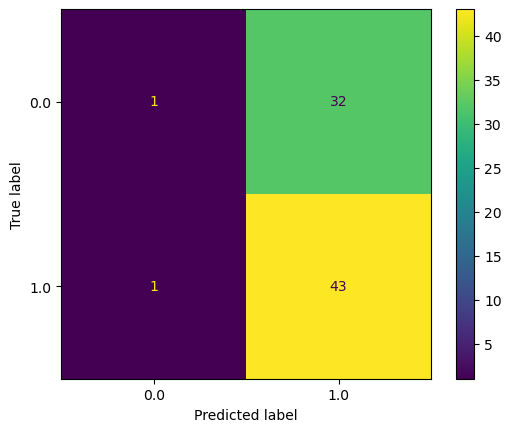

In [166]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model_0 = LogisticRegression(C= 1.0, penalty= 'l2', solver= 'liblinear')
model_0.fit(X_train, y_train)

y_pred = model_0.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100

conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f} %")
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model_0.classes_)
disp.plot()

In [6]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'newton-cholesky', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.541641 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.532615 (0.042011) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.532615 (0.042011) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.532615 (0.042011) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.532615 (0.042011) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.532615 (0.042011) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.532615 (0.042011) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.536513 (0.038776) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.536513 (0.038776) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.536513 (0.038776) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.536513 (0.038776) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.536513 (0.038776) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.536513 (0.038776) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.540308 (0.023918) with: {'

In [228]:
joblib.dump(model_0,'Logistic_Reg_Model.pkl')

['Logistic_Reg_Model.pkl']

Accuracy: 59.38 %
Confusion Matrix:


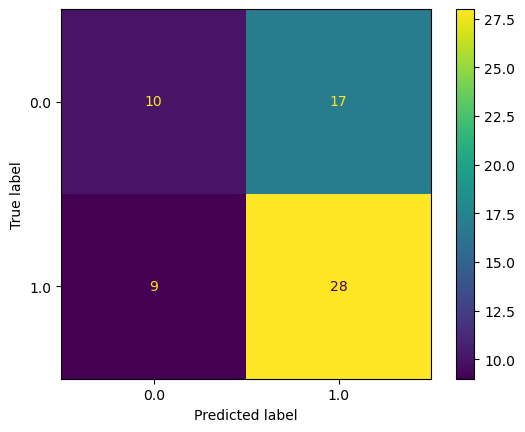

In [167]:
# KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model_1 = KNeighborsClassifier(metric= 'euclidean',n_neighbors= 17, weights= 'uniform')

# Fit the model to the training data
model_1.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = model_1.predict(X_test)

# Step 7: Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f} %")
print(f"Confusion Matrix:")
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model_1.classes_)
disp.plot()

In [168]:
joblib.dump(model_1, 'KNN_model.pkl')

['KNN_model.pkl']

In [33]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.562745 using {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'uniform'}
0.427206 (0.111126) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.427206 (0.111126) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.483701 (0.157825) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.445221 (0.137503) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.484191 (0.132422) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.458946 (0.144232) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.494118 (0.127277) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.451103 (0.140658) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.508701 (0.117392) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.451348 (0.127366) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.531985 

Accuracy: 62.34 %
Confusion Matrix:


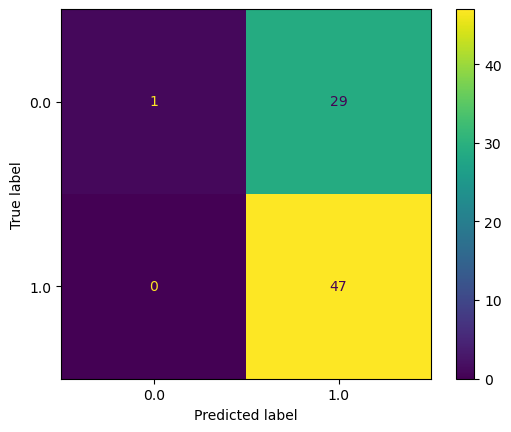

In [186]:
# SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model_2 = SVC(kernel='poly', gamma='scale', C=5)

# Train the SVM classifier
model_2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f} %")
print(f"Confusion Matrix:")
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model_2.classes_)
disp.plot()

In [40]:
# define model and parameters
from tqdm import tqdm
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [5.0, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in tqdm(zip(means, stds, params)):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.552105 using {'C': 5.0, 'gamma': 'scale', 'kernel': 'poly'}


12it [00:00, 6014.06it/s]

0.552105 (0.023561) with: {'C': 5.0, 'gamma': 'scale', 'kernel': 'poly'}
0.525965 (0.038806) with: {'C': 5.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.492632 (0.091184) with: {'C': 5.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.552105 (0.023561) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.529386 (0.034859) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.508246 (0.093114) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.552105 (0.023561) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.552105 (0.023561) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.552105 (0.023561) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.552105 (0.023561) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
0.552105 (0.023561) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.552105 (0.023561) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [187]:
joblib.dump(model_2, 'SVM_Model.pkl')

['SVM_Model.pkl']

Accuracy: 69.23 %
Confusion Matrix:


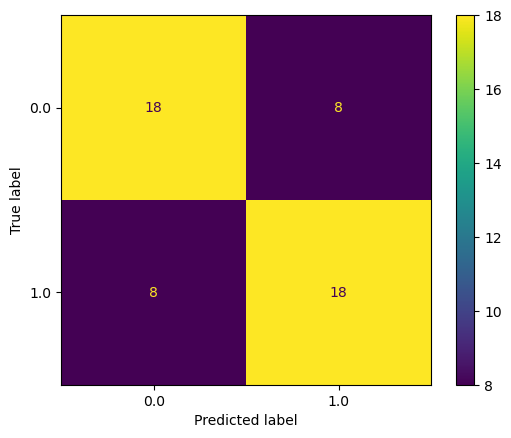

In [64]:
# Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model_3 =  BaggingClassifier(n_estimators= 10, max_samples=50)
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f} %")
print(f"Confusion Matrix:")
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model_3.classes_)
disp.plot()

In [86]:
joblib.dump(model_3, 'bagging_decision_tree.pkl')

['bagging_decision_tree.pkl']

In [12]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [2, 10, 50]
max_samples = [1, 2, 5, 10, 50]
max_features = [1, 2, 5, 10]
# define grid search
grid = dict(n_estimators=n_estimators, max_samples=max_samples, max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.516923 using {'max_features': 1, 'max_samples': 2, 'n_estimators': 10}
0.489641 (0.039753) with: {'max_features': 1, 'max_samples': 1, 'n_estimators': 2}
0.494564 (0.040719) with: {'max_features': 1, 'max_samples': 1, 'n_estimators': 10}
0.508000 (0.040294) with: {'max_features': 1, 'max_samples': 1, 'n_estimators': 50}
0.486769 (0.062074) with: {'max_features': 1, 'max_samples': 2, 'n_estimators': 2}
0.516923 (0.074100) with: {'max_features': 1, 'max_samples': 2, 'n_estimators': 10}
0.488359 (0.080498) with: {'max_features': 1, 'max_samples': 2, 'n_estimators': 50}
0.475385 (0.083923) with: {'max_features': 1, 'max_samples': 5, 'n_estimators': 2}
0.485692 (0.075952) with: {'max_features': 1, 'max_samples': 5, 'n_estimators': 10}
0.514205 (0.081518) with: {'max_features': 1, 'max_samples': 5, 'n_estimators': 50}
0.502205 (0.090256) with: {'max_features': 1, 'max_samples': 10, 'n_estimators': 2}
0.491590 (0.085431) with: {'max_features': 1, 'max_samples': 10, 'n_estimators': 10}

C:\Users\ompat\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1350 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ompat\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ompat\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py", line 337, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ompat\anaconda3\Lib\site-packages\sklearn\

Accuracy: 64.94 %
Confusion Matrix:


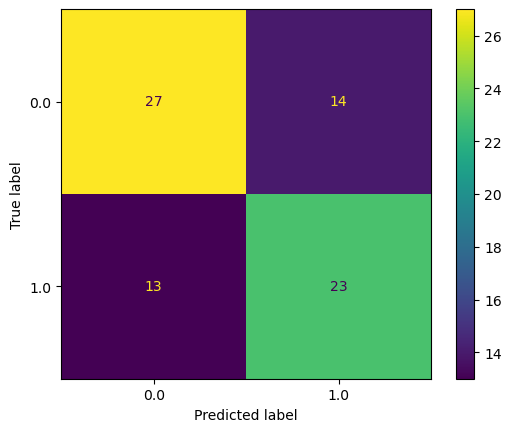

In [193]:
# Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model_4 =  RandomForestClassifier(max_features= 'sqrt', n_estimators=100)
model_4.fit(X_train, y_train)
y_pred = model_4.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f} %")
print(f"Confusion Matrix:")
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model_4.classes_)
disp.plot()

In [194]:
joblib.dump(model_4, 'Random_forest_model.pkl')

['Random_forest_model.pkl']

In [261]:
model = RandomForestClassifier()
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.424474 using {'max_features': 'log2', 'n_estimators': 10}
0.420877 (0.119589) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.408772 (0.114964) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.424474 (0.116903) with: {'max_features': 'log2', 'n_estimators': 10}
0.408772 (0.114964) with: {'max_features': 'log2', 'n_estimators': 100}


Accuracy: 60.94 %
Confusion Matrix:


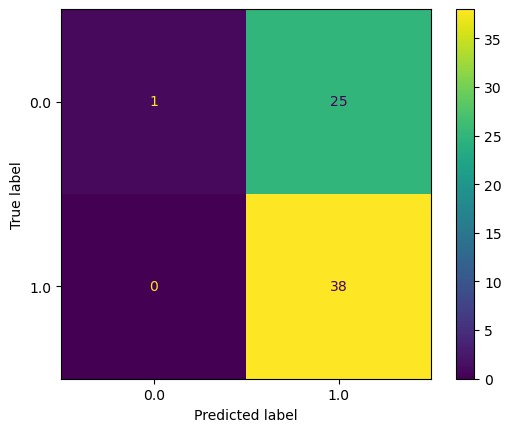

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model_5 =  GaussianNB(var_smoothing=1.0)
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f} %")
print(f"Confusion Matrix:")
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model_5.classes_)
disp.plot()

In [260]:
model = GaussianNB()

# Define the hyperparameters to tune
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# Define the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

# Fit the model
grid_result = grid_search.fit(X_train, y_train)

# Summarize the best score and hyperparameters
print(f"Best Accuracy: {grid_result.best_score_:.4f} using {grid_result.best_params_}")

# Summarize all results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.4f} ({stdev:.4f}) with: {param}")

Best Accuracy: 0.5019 using {'var_smoothing': 1.0}
0.5019 (0.0557) with: {'var_smoothing': 1.0}
0.4950 (0.0625) with: {'var_smoothing': 0.8111308307896871}
0.4881 (0.0679) with: {'var_smoothing': 0.657933224657568}
0.4865 (0.0687) with: {'var_smoothing': 0.533669923120631}
0.4777 (0.0691) with: {'var_smoothing': 0.43287612810830584}
0.4794 (0.0635) with: {'var_smoothing': 0.3511191734215131}
0.4828 (0.0580) with: {'var_smoothing': 0.2848035868435802}
0.4776 (0.0518) with: {'var_smoothing': 0.23101297000831597}
0.4759 (0.0528) with: {'var_smoothing': 0.1873817422860384}
0.4706 (0.0570) with: {'var_smoothing': 0.15199110829529336}
0.4741 (0.0571) with: {'var_smoothing': 0.12328467394420659}
0.4741 (0.0571) with: {'var_smoothing': 0.1}
0.4741 (0.0571) with: {'var_smoothing': 0.08111308307896872}
0.4725 (0.0570) with: {'var_smoothing': 0.0657933224657568}
0.4760 (0.0616) with: {'var_smoothing': 0.0533669923120631}
0.4760 (0.0616) with: {'var_smoothing': 0.04328761281083057}
0.4760 (0.0616)

In [259]:
joblib.dump(model_5, 'Gaussian_NB.pkl')

['Gaussian_NB.pkl']